# HOW TO IMPROVE THE ACCURACY OF A REGRESSION MODEL

### Dataset -> Health insurance dataset with customer information on insurance charges, age, sex, BMI, etc

In [19]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1334 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


The dataset has 1338 records and 6 features.

As you see:
'smoker','sex''region' are categorical variables.
'age','bmi' and 'children' are numeric.


'age' and 'bmi' columns has missing values.

### Handling Null/ Missing values

In [4]:
#Let's examine how many missing values has each column
df.isnull().sum().sort_values(ascending=False)

age         4
bmi         2
charges     0
region      0
smoker      0
children    0
sex         0
dtype: int64

In the dataset the 'age' column has 4 missing values and 'bmi' has 2 missing values.

In [8]:
#Show the 4 missing values in 'age' column
df[df['age'].isnull()]

,age,sex,bmi,children,smoker,region,charges
790,NaN,female,41.800,0,no,southeast,5662.22500
794,NaN,female,31.920,2,no,northwest,7209.49180
865,NaN,male,29.900,2,no,southwest,6600.36100
1198,NaN,male,29.355,1,no,northwest,6393.60345


In [9]:
#Show the 4 missing values in 'bmi' column
df[df['bmi'].isnull()]

,age,sex,bmi,children,smoker,region,charges
253,27.0,male,NaN,3,no,southwest,4260.7440
429,27.0,female,NaN,3,no,northwest,18804.7524


### To handle this missing data, we gonna use Sklearn'SimpleImputer.

That permits replace missing values based on mean/median/mode value in the respective columns.

In [10]:
from sklearn.impute import SimpleImputer

In [14]:
#Instantiate SimpleImputer
si=SimpleImputer(missing_values = np.nan, strategy='median')
si.fit(df[['age', 'bmi']])
  
#Filling missing data with median
df[['age', 'bmi']] = si.transform(df[['age', 'bmi']])

In [15]:
#Now let's check the missing values
df.isnull().sum().sort_values(ascending=False)

charges     0
region      0
smoker      0
children    0
bmi         0
sex         0
age         0
dtype: int64

### Data Visualization

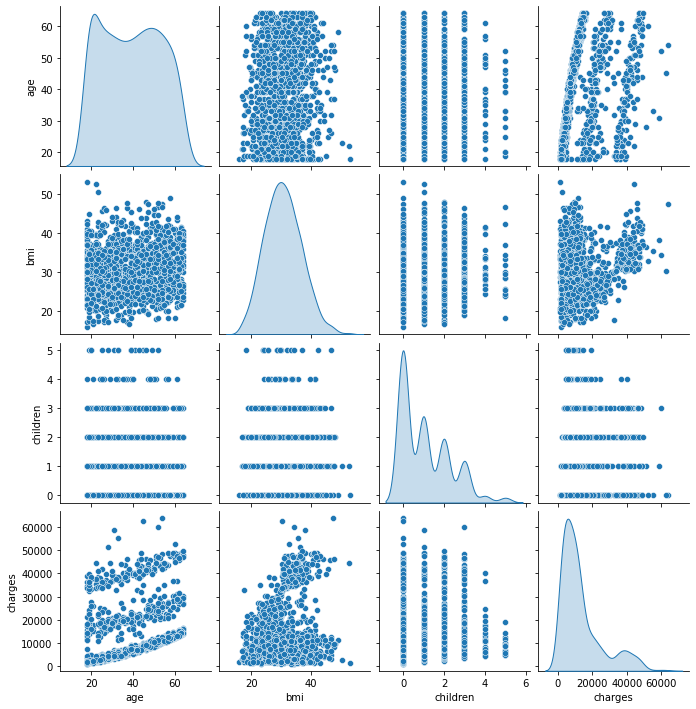

In [21]:
#With data clean, we will look at analyzing data thorough visualizations and plots
sns.pairplot(data=df, diag_kind='kde')

C:\Users\tuto\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


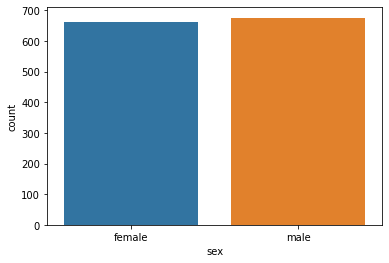

In [31]:
#Now Value Counts of Gender, Smoker, Children and Region
fig, ax = plt.subplots()
ax = sns.countplot('sex', data=df)

C:\Users\tuto\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


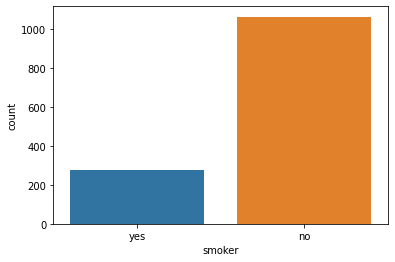

In [32]:
fig, ax = plt.subplots()
ax = sns.countplot('smoker', data=df)

C:\Users\tuto\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


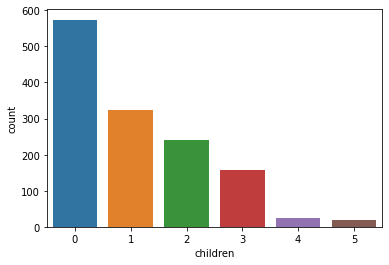

In [33]:
fig, ax = plt.subplots()
ax = sns.countplot('children', data=df)

C:\Users\tuto\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


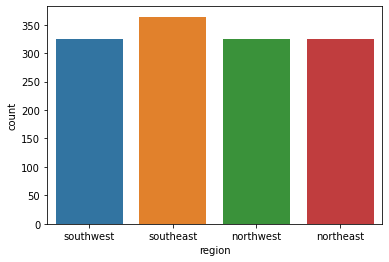

In [34]:
fig, ax = plt.subplots()
ax = sns.countplot('region', data=df)

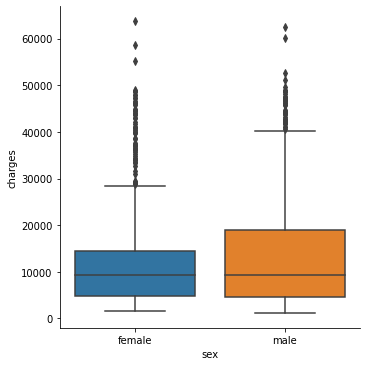

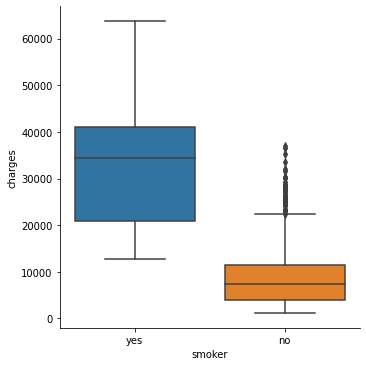

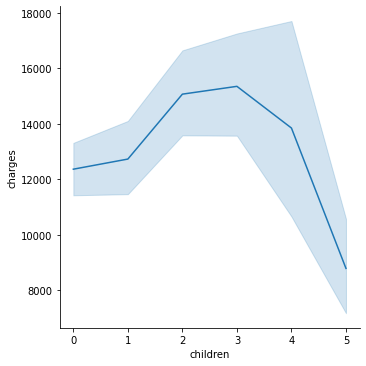

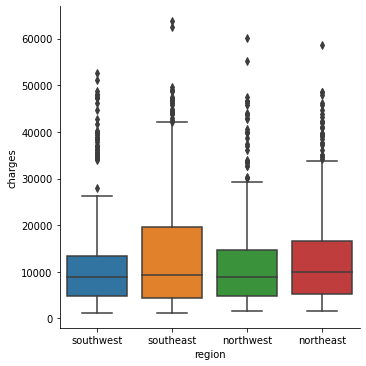

In [43]:
# Plot of Gender, Smoker and Region vs Charges
sns.catplot(x='sex', y='charges', data=df, kind='box')
sns.catplot(x='smoker', y='charges', data=df, kind='box')
sns.relplot(x='children', y='charges', data=df, kind='line')
sns.catplot(x='region', y='charges', data=df, kind='box')

### Observations based on the above plots

1. Males and females are almost equal in number
2. Insurance charges are higher for smoker
3. Charges are highest for people with 2-3 children
4. Customers are almost equally distributed across the 4 regions.
5. Percentage of female smokers is less than the percentage of male smokers.

### We can conclude that 'smokers' has a considerable impact on the insrance charges, while gender has the least impact.

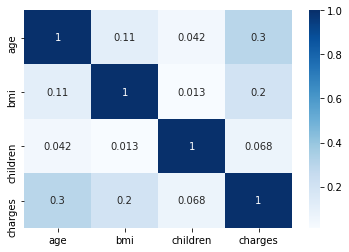

In [50]:
#Let's create a heatmap to understand the strength of the correlation between charges an numeric features
sns.heatmap(df[['age','bmi','children','charges']].corr(),cmap='Blues', annot=True)
plt.show()

We see that 'age' and 'BMI' have an average positive correlation with charges

# We will now go over the steps of model preparation and model development one by one

### 1.Feature Encoding

In this step, we convert categorical variables (smoker,sex,region) to numeric format as most of the algorithms cannot handle non-numeric data. 

In [52]:
#One hot encoding

region = pd.get_dummies(df.region, prefix='location')
df = pd.concat([df,region],axis=1)
df.drop(columns='region', inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,location_northeast,location_northwest,location_southeast,location_southwest
0,19.0,female,27.900,0,yes,16884.92400,0,0,0,1
1,18.0,male,33.770,1,no,1725.55230,0,0,1,0
2,28.0,male,33.000,3,no,4449.46200,0,0,1,0
3,33.0,male,22.705,0,no,21984.47061,0,1,0,0
4,32.0,male,28.880,0,no,3866.85520,0,1,0,0


In the previous step. get_dummies() method converted the region column in numerical values. As we see in the dataframe it has 4 new columns that represents each value of the region column (northeast, northwest, southwast, southwest ) 

In [70]:
#Let's do the same with the other categorical variables ()sex,smoker)
df.sex.replace(to_replace=['male','female'],value=[1,0], inplace=True)

In [66]:
df.smoker.replace(to_replace=['yes', 'no'], value=[1,0], inplace=True)

In [67]:
df.head()

,age,sex,bmi,children,smoker,charges,location_northeast,location_northwest,location_southeast,location_southwest
0,19.0,0,27.900,0,1,16884.92400,0,0,0,1
1,18.0,1,33.770,1,0,1725.55230,0,0,1,0
2,28.0,1,33.000,3,0,4449.46200,0,0,1,0
3,33.0,1,22.705,0,0,21984.47061,0,1,0,0
4,32.0,1,28.880,0,0,3866.85520,0,1,0,0


Now, we have all columns with numerical values

### 2. Feature Selection and Scaling

Next, we will select features that affect 'charges' the most. 

In [73]:
#Feature Selection

X = df.drop(columns='charges', axis=1)
y = df['charges']

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Once we have selected our features, we need to 'standardize' the numeric ones (age,bmi, children)

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
#Scaling numeri features using sklearn StandardScalar
numeric = ['age','bmi','children']
sc = StandardScaler()
X_train[numeric] = sc.fit_transform(X_train[numeric])
X_test[numeric] = sc.fit_transform(X_test[numeric])

ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tuto\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [80]:
X_train.head()

,age,sex,bmi,children,smoker,location_northeast,location_northwest,location_southeast,location_southwest
560,0.472360,0,-1.756542,0.734336,0,0,1,0,0
1285,0.543447,0,-1.033098,-0.911192,0,1,0,0,0
1142,0.898879,0,-0.943703,-0.911192,0,0,0,1,0
969,-0.025246,0,0.622378,3.202629,0,0,0,1,0
486,1.041052,0,-1.504909,1.557100,0,0,1,0,0


Now, we can see that the numeric(not binary) columns are scaled

### We will try linear Regression and Decision Trees to predict insurance charges

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y 
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
#Metrics to evaluate your model 
r2_score(y_test, ypred), mean_absolute_error(y_test, ypred),np.sqrt(mean_squared_error(y_test, ypred))

(0.7836635373991971, 4167.89170382883, 5795.339627165274)

In [84]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(0.7733133895103383, 2832.8433072238804, 5932.352714116864)

The Mean Absolute Error(MAE) and Root-Mean-Square Error(RMSE) are the metrics used to evaluate regression models, the idea is these metrics should yield the lowest possible results

For r2_score, It yields the score:

78.3 % for linear regression model

77.3 % for decision tree model

### Use of Ensemble and Boosting Algorithms

Now we will use RandomForest, GradientBoosting, LightGBM, and XGBoost.

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

In [94]:
model = RandomForestRegressor()
#transforming target variable through quantile transformer
model.fit(X_train, y_train)
yhat = model.predict(X_test)
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(0.862414944379182, 2746.3410634449942, 4621.677764335925)

As we can see, the MSE and RMSE reduced their value.
And for r2_score, It increased their score:

86 % RandomForest Model

### Now, we will try with some boosting algorithms such as Gradien Boosting

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

gbt = GradientBoostingRegressor()
gbt.fit(X_train,y_train)

yhat=gbt.predict(X_test)

r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

(0.8763771917239397, 2603.7880387992213, 4380.8999267626605)

The MSE and RMSE reduced their values.
And for r2_score, It increased their score:

87.6 % GradientBoostingRegressor Model

### Hyperparameter TUNNING!!!

Let’s tweak some of the algorithm parameters such as tree depth, estimators, learning rate, etc, and check for model accuracy. Manually trying out different combinations of parameter values is very time-consuming. Scikit-learn’s GridSearchCV automates this process and calculates optimized values for these parameters. I have applied GridSearch to the above GradientBoostingRegressor

In [102]:
from sklearn.model_selection import GridSearchCV

In [110]:
param_grid = {'n_estimators': [300,400,500],  
              'max_depth': [4,6,8],
              'min_samples_leaf':[0.1,0.2],
              'max_features':['log2','sqrt'],
             }
                
grid = GridSearchCV(estimator=gbt, param_grid=param_grid,refit=True, cv=3, verbose = 3, n_jobs=-1) #

# fitting the model for grid search 
grid.fit(X_train, y_train)
best_params=grid.best_params_
print(best_params)

#using best params to create and fit model
best_model = GradientBoostingRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], min_samples_leaf=best_params["min_samples_leaf"], max_features=best_params["max_features"])
best_model.fit(X_train, y_train)
yhat = best_model.predict(X_test)

#evaluate metrics
r2_score(y_test, yhat), mean_absolute_error(y_test, yhat), np.sqrt(mean_squared_error(y_test, yhat))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'n_estimators': 300}


(0.8765597883712177, 2654.749993329871, 4377.6633345249975)

### Finally we can see that using the best parameters we get 87.6 % of accuracy!!!

# The project was made with the guide from this link:  https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604